# 利用SVD简化数据

SVD 算法特点:
- 优点：简化数据，去除噪声，优化算法的结果
- 缺点：数据的转换可能难以理解
- 使用的数据类型：数值型数据


## 隐性语义索引
隐性语义检索（Latent Semantic Indexing, LSI）或 隐形语义分析（Latent Semantic Analysis, LSA）

隐性语义索引：矩阵 = 文档 + 词语


## 推荐系统

### 推荐系统 概述

`推荐系统是利用电子商务网站向客户提供商品信息和建议，帮助用户决定应该购买什么产品，模拟销售人员帮助客户完成购买过程。`

### 推荐系统 场景

1. Amazon 会根据顾客的购买历史向他们推荐物品
2. Netflix 会向其用户推荐电影
3. 新闻网站会对用户推荐新闻频道

### 推荐系统 要点

> 基于协同过滤(collaborative filtering) 的推荐引擎

* 利用Python 实现 SVD(Numpy 有一个称为 linalg 的线性代数工具箱)
* 协同过滤：是通过将用户和其他用户的数据进行对比来实现推荐的。
* 当知道了两个用户或两个物品之间的相似度，我们就可以利用已有的数据来预测未知用户的喜好。

> 基于物品的相似度和基于用户的相似度：物品比较少则选择物品相似度，用户比较少则选择用户相似度。【矩阵还是小一点好计算】

* 基于物品的相似度：计算物品之间的距离。【耗时会随物品数量的增加而增加】
* 由于物品A和物品C 相似度(相关度)很高，所以给买A的人推荐C。

* 基于用户的相似度：计算用户之间的距离。【耗时会随用户数量的增加而增加】
* 由于用户A和用户C 相似度(相关度)很高，所以A和C是兴趣相投的人，对于C买的物品就会推荐给A。

> 相似度计算

* inA, inB 对应的是 列向量
1. 欧氏距离：指在m维空间中两个点之间的真实距离，或者向量的自然长度（即该点到原点的距离）。二维或三维中的欧氏距离就是两点之间的实际距离。
    * 相似度= 1/(1+欧式距离)
    * `相似度= 1.0/(1.0 + np.linalg.norm(inA - inB))`
    * 物品对越相似，它们的相似度值就越大。
2. 皮尔逊相关系数：度量的是两个向量之间的相似度。
    * 相似度= 0.5 + 0.5* np.corrcoef() 【皮尔逊相关系数的取值范围从 -1 到 +1，通过函数0.5 + 0.5\*corrcoef()这个函数计算，把值归一化到0到1之间】
    * `相似度= 0.5 + 0.5 * np.corrcoef(inA, inB, rowvar = 0)[0][1]`
    * 相对欧氏距离的优势：它对用户评级的量级并不敏感。
3. 余弦相似度：计算的是两个向量夹角的余弦值。
    * 余弦值 = (A·B)/(||A||·||B||) 【余弦值的取值范围也在-1到+1之间】
    * 相似度= 0.5 + 0.5 * 余弦值
    * `相似度= 0.5 + 0.5*float(inA.T*inB) / (np.linalg.norm(inA)*np.linalg.norm(inB))`
    * 如果夹角为90度，则相似度为0；如果两个向量的方向相同，则相似度为1.0。

> 推荐系统的评价

* 采用交叉测试的方法。【拆分数据为训练集和测试集】
* 推荐引擎评价的指标： 最小均方根误差(Root mean squared error, RMSE)，也称标准误差(Standard error)，就是计算均方误差的平均值然后取其平方根。
    * 如果RMSE=1, 表示相差1个星级；如果RMSE=2.5, 表示相差2.5个星级。

### 推荐系统 原理

* 推荐系统的工作过程：给定一个用户，系统会为此用户返回N个最好的推荐菜。
* 实现流程大致如下：
    1. 寻找用户没有评级的菜肴，即在用户-物品矩阵中的0值。
    2. 在用户没有评级的所有物品中，对每个物品预计一个可能的评级分数。这就是说：我们认为用户可能会对物品的打分（这就是相似度计算的初衷）。
    3. 对这些物品的评分从高到低进行排序，返回前N个物品。

### 项目案例: 餐馆菜肴推荐系统

#### 项目概述

`假如一个人在家决定外出吃饭，但是他并不知道该到哪儿去吃饭，该点什么菜。推荐系统可以帮他做到这两点。`

#### 开发流程

> 收集 并 准备数据

> 分析数据: 这里不做过多的讨论(当然此处可以对比不同距离之间的差别)

> 训练算法: 基于物品相似度 或者是 基于SVD，得到推荐的物品评分

> 测试

**基于SVD**:

1. 对用户-物品 矩阵进行SVD分解
1. 在确保90%总能量的前提下, 取奇异值矩阵
1. 对 用户-物品 矩阵进行降维
1. 对用户u未评过分的物品i
1. 取每个用户u评过分的物品j
1. 根据降维后的 用户-物品矩阵, 计算出i, j的相似度r
1. 根据相似度r 及用户u对物品j的评分预测u对物品i的评分

In [3]:
import numpy as np

np.set_printoptions(precision=4, suppress=True)

In [46]:
class Recommend:
    def __init__(self, similarity = 'euclidean'):
        # euclidean  cosine pearson
        self.sim = similarity
    
    def get_sim(self, inA, inB):
        # inA inB 列向量 维度(k, 1)
        if self.sim == 'cosine':
            return 0.5 + 0.5*(inA.T*inB) / (np.linalg.norm(inA) * np.linalg.norm(inB))
        elif self.sim == 'pearson':
            return 0.5 + 0.5 * np.corrcoef(inA, inB, rowvar=False)[0][1]
        else:
            return 1.0/(1.0 + np.linalg.norm(inA - inB))
    
    def transform(self, X):
        # 矩阵奇异值分解, 90%能量 sigma
        u, sigma, vt = np.linalg.svd(X)
        w = np.sum(sigma ** 2) * 0.9
        for i in range(1, len(sigma)):
            s = sigma[:i]
            if np.sum(s ** 2) >= w:
                break
        return u, sigma, vt, i
        
    
    def fit(self, X):
        self.X = X
        self.n_food = X.shape[1]
        u, sigma, vt, k = self.transform(X)
        # 物品矩阵降维 (I, k) 只含k个特征
        self.xformedItems = X @ u[:, :k] @ np.diag(sigma)[:k, :k]
        # self.new_matrix = np.dot(X, u[:, :k]) * sigma[:k]
        
    def predict1(self, user):
        user_food = self.X[user].copy()
        not_rating = np.where(self.X[user] == 0)[0]
        ratings = []
        print('not rating', not_rating)
        # 根据相似度 推测未评价物品的评分
        for i in not_rating:
            sim_total = 0
            score = 0
            for j in range(self.n_food): 
                # 根据用户u打过分的物品j推测物品i的rating
                if j == i:
                    continue
                similarity = self.get_sim(self.xformedItems[i].T, self.xformedItems[j].T)
                # print(f'物品{i} 与物品{j}的相似度为: {similarity}')
                sim_total += similarity
                score += similarity * user_food[j]
            if sim_total == 0:
                score = 0
            else:
                score /= sim_total
            ratings.append(score)
        ratings = np.array(ratings)
        # 根据评分大小顺序返回
        return not_rating[np.argsort(ratings)[::-1]], ratings[np.argsort(ratings)[::-1]]

    def predict2(self, user):
        # 基于物品相似度
        # 物品数据
        n = self.X.shape[1]
        sim_total = 0
        rat_total = 0
        # 未评分的
        not_rating = np.where(self.X[user] == 0)[0]
        ratings = []
        for i in not_rating:
            for j in range(n):
                # 如果某个物品的评分值为0，则跳过这个物品
                if j == i:
                    continue
                user_rating = self.X[user, j]
                # 2个物品是否被评分过
                overlap = np.nonzero(np.logical_and(self.X[:, i]>0, self.X[user, j>0]))[0]
                if len(overlap) == 0:
                    similarity = 0  # 无法比较
                else:  # 有重合可以比较相似度
                    similarity = self.get_sim(self.X[overlap, i], self.X[overlap, j])
                sim_total += similarity
                rat_total += similarity * user_rating
            if similarity == 0:
                rat_total = 0
            else:
                rat_total /= sim_total
            ratings.append(rat_total)
        ratings = np.array(ratings)
            
        return not_rating[np.argsort(ratings)[::-1]], ratings[np.argsort(ratings)[::-1]]

In [24]:
# 行:每一个user  列:菜肴 
# 数值 0表示用户没有进行评价 1-5为评分
food_1 = np.array(
          [[2., 0, 0, 4, 4, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5],
           [0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0],
           [3, 3, 4, 0, 3, 0, 0, 2, 2, 0, 0],
           [5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0],
           [4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 5],
           [0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4],
           [0, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0],
           [0, 0, 0, 3, 0, 0, 0, 0, 4, 5, 0],
           [1, 1, 2, 1, 1, 2, 1, 0, 4, 5, 0]])

In [36]:
np.where(food_1[0] == 0)[0]

array([ 1,  2,  5,  6,  7,  8,  9, 10])

In [20]:
np.nonzero(np.logical_and(food_1[:, 1] > 0, food_1[:, 2]))[0]

(array([ 3,  4, 10]),)

In [47]:
clf = Recommend()
clf.fit(food_1)

clf.predict2(3)
# clf.xformedItems

(array([ 3,  5,  6,  9, 10]), array([2.    , 1.36  , 0.7448, 0.4937, 0.3733]))

In [48]:
clf.predict1(3)

not rating [ 3  5  6  9 10]


(array([ 5,  3,  6,  9, 10]), array([1.9228, 1.6464, 1.5539, 1.4725, 1.4053]))


### 图像压缩
例如：$ 32 * 32=1024 => 32 * 2 + 2 * 1+ 32 * 2=130$($2 * 1$表示去掉了除对角线的0), 几乎获得了10倍的压缩比。

1. 导入文件, 获得数据矩阵
1. 分析数据: 要保留80%~90%能量, 确定Sigma矩阵长度
1. 生成新的矩阵
1. 打印矩阵

In [6]:
def load_data(file):
    data = []
    with open(file) as f:
        for line in f.readlines():
            data.append([int(i) for i in line.strip()])
    return np.array(data)

# 打印矩阵
def print_matrix(X, thresh=0.8):
    m, n = X.shape
    # 由于矩阵保护了浮点数，因此定义浅色和深色，遍历所有矩阵元素，当元素大于阀值时打印1，否则打印0
    for i in range(m):
        for k in range(n):
            if float(X[i, k]) > thresh:
                print(1, end='')
            else:
                print(0, end='')
        print('')

In [7]:
data = load_data('/mnt/data1/workspace/AI/data/机器学习/14.SVD/0_5.txt')
print_matrix(data)

00000000000000110000000000000000
00000000000011111100000000000000
00000000000111111110000000000000
00000000001111111111000000000000
00000000111111111111100000000000
00000001111111111111110000000000
00000000111111111111111000000000
00000000111111100001111100000000
00000001111111000001111100000000
00000011111100000000111100000000
00000011111100000000111110000000
00000011111100000000011110000000
00000011111100000000011110000000
00000001111110000000001111000000
00000011111110000000001111000000
00000011111100000000001111000000
00000001111100000000001111000000
00000011111100000000001111000000
00000001111100000000001111000000
00000001111100000000011111000000
00000000111110000000001111100000
00000000111110000000001111100000
00000000111110000000001111100000
00000000111110000000011111000000
00000000111110000000111111000000
00000000111111000001111110000000
00000000011111111111111110000000
00000000001111111111111110000000
00000000001111111111111110000000
00000000000111111111111000000000
0000000000

In [11]:
u, sigma, vt = np.linalg.svd(data)

In [24]:
new_data = u[:, :5] @ np.diag(sigma[:5]) @ vt[:5, :] 
print_matrix(new_data)

00000000000000000000000000000000
00000000000000111100000000000000
00000000000000111110000000000000
00000000000011111110000000000000
00000000111111111111000000000000
00000000111111111111100000000000
00000000111111111111110000000000
00000000111111000001111000000000
00000000111110000000111000000000
00000001111100000000011100000000
00000011111100000000011110000000
00000011111100000000011110000000
00000011111100000000011110000000
00000000111100000000001111000000
00000001111100000000001111000000
00000001111100000000001111000000
00000001111100000000001111000000
00000001111100000000001111000000
00000001111100000000001111000000
00000001111100000000001110000000
00000000111110000000001111000000
00000000111110000000001111000000
00000000111110000000001111000000
00000000111110000000001111000000
00000000111110000000001110000000
00000000111110000000111100000000
00000000001111111111111110000000
00000000000111111111111110000000
00000000000111111111111110000000
00000000000011111111110000000000
0000000000

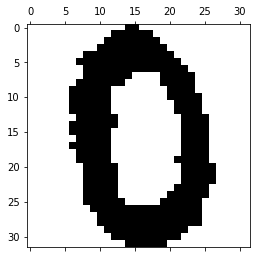

In [8]:
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
plt.matshow(data, cmap=matplotlib.cm.binary)

In [26]:
class ImagePress:
    def __init__(self, threshold=0.8):
        self.threshold = threshold
        
    def transform(self, X):
        # 矩阵奇异值分解, 90%能量 sigma
        u, sigma, vt = np.linalg.svd(X)
        w = np.sum(sigma ** 2) * self.threshold
        for i in range(1, len(sigma)):
            s = sigma[:i]
            if np.sum(s ** 2) > w:
                break
        return u, sigma, vt, i
    
    def fit_transform(self, X):
        u, sigma, vt, k = self.transform(X)
        new_matrix = u[:, :k] @ np.diag(sigma[:k]) @ vt[:k, :]
        # np.dot(u[:, :k] * sigma[:k], vt[:k, :])
        return new_matrix
    
    def save(self, u, sigma, vt):
        pass

In [27]:
imagepress = ImagePress()
new_data = imagepress.fit_transform(data)
print_matrix(new_data)

00000000000000000000000000000000
00000000000000000000000000000000
00000000000001111100000000000000
00000000000011111111000000000000
00000000000111111111100000000000
00000000001111111111110000000000
00000000001111111111110000000000
00000000011110000000001000000000
00000000111100000000001100000000
00000000111100000000001110000000
00000000111100000000001110000000
00000000111100000000001110000000
00000000111100000000001110000000
00000000111100000000001110000000
00000000111100000000001110000000
00000000111100000000001110000000
00000000111100000000001110000000
00000000111100000000001110000000
00000000111100000000001110000000
00000000111100000000001110000000
00000000111100000000001110000000
00000000111100000000001110000000
00000000111100000000001110000000
00000000111100000000001110000000
00000000111100000000001110000000
00000000111100000000001100000000
00000000001111111111111000000000
00000000001111111111110000000000
00000000001111111111110000000000
00000000000011111111100000000000
0000000000

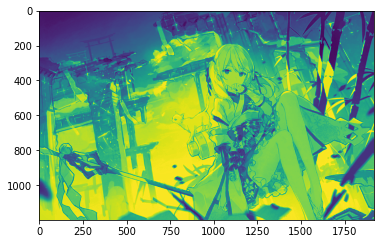

In [30]:
img = plt.imread('/home/ulysses/Pictures/111.jpg')
plt.imshow(img[...,0])

In [31]:
imgpress = ImagePress()
new_img = imgpress.fit_transform(img[...,0])

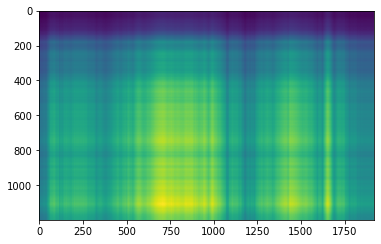

In [32]:
plt.imshow(new_img)